Unit 7 | Assignment - Distinguishing Sentiments
Background
Twitter has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose one of the following two assignments, in which you will do just that. Good luck!

News Mood
In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

output_10_0.png
output_13_1.png
The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:

Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.
As final considerations:

Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data.
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called  README.md in your GitHub repository.
PlotBot
In this activity, more challenging than the last, you will build a Twitter bot that sends out visualized sentiment analysis of a Twitter account's recent tweets.

Visit https://twitter.com/PlotBot5 for an example of what your script should do.

The bot receives tweets via mentions and in turn performs sentiment analysis on the most recent twitter account specified in the mention

For example, when a user tweets, "@PlotBot Analyze: @CNN," it will trigger a sentiment analysis on the CNN twitter feed.

A plot from the sentiment analysis is then tweeted to the PlotBot5 twitter feed. See below for examples of scatter plots you will generate:

@juanitasoranno.png
@nancypwong.png
nytimes.png
Hints, requirements, and considerations:

Your bot should scan your account every five minutes for mentions.
Your bot should pull 500 most recent tweets to analyze for each incoming request.
Your script should prevent abuse by analyzing only Twitter accounts that have not previously been analyzed.
Your plot should include meaningful legend and labels.
It should also mention the Twitter account name of the requesting user.
When submitting your assignment, be sure to have at least three analyses tweeted out from your account (enlist the help of classmates, friends, or family, if necessary!).
Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, TextBlob, and Seaborn.
You may find it helpful to organize your code in function(s), then call them.
If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: https://www.tutorialspoint.com/python/python_functions.htm.


ANALYSIS AND OBSERVATIONS


1. CBS has the most positive tweet sentiments over time and highest average positive tweets.

2. Fox News has the most negative tweets sentiments over time, followed by CNN.

3. BBC has the most neutral tweets over time followed by New York Times. 

In [1]:
# Import Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
seaborn.set()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Retrieve 100 tweets
cnn_tweets = api.user_timeline("@CNN", count=100)
foxnews_tweets = api.user_timeline("@FoxNews", count=100)
cbs_tweets = api.user_timeline("@CBS", count=100)
nytimes_tweets = api.user_timeline("@nytimes", count=100)
bbc_tweets = api.user_timeline("@BBC", count=100)




In [3]:
# Run analysis
all_tweets=cnn_tweets+foxnews_tweets+bbc_tweets+cbs_tweets+nytimes_tweets
sentiments = []
for tweet in all_tweets:
    results = analyzer.polarity_scores(tweet.text)
    sentiments.append(results)
print(sentiments)


[{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}, {'neg': 0.115, 'neu': 0.721, 'pos': 0.163, 'compound': 0.25}, {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'compound': 0.5859}, {'neg': 0.218, 'neu': 0.446, 'pos': 0.337, 'compound': 0.34}, {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compound': -0.4588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.427, 'neu': 0.573, 'pos': 0.0, 'compound': -0.7717}, {'neg': 0.197, 'neu': 0.803, 'pos': 0.0, 'compound': -0.4019}, {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.6588}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.417, 'neu': 0.583, 'pos': 0.0, 'compound': -0.6124}, {'neg': 0.164, 'neu': 0.667, 'pos': 0.17, 'compound': 0.0258}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'compound': 0.7108}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, '

In [4]:
#Create dataframe of sentiments
sentiment_df=pd.DataFrame(sentiments)
sentiment_df.head()

,compound,neg,neu,pos
0,-0.5719,0.236,0.764,0.000
1,0.2500,0.115,0.721,0.163
2,0.5859,0.000,0.847,0.153
3,0.3400,0.218,0.446,0.337
4,-0.4588,0.250,0.750,0.000


In [5]:
dir(all_tweets[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'extended_entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [6]:
screen_names=[tweet.author.name for tweet in all_tweets]
screen_names[:5]

['CNN', 'CNN', 'CNN', 'CNN', 'CNN']

In [7]:
sentiment_df["Company"]=screen_names
sentiment_df

,compound,neg,neu,pos,Company
0,-0.5719,0.236,0.764,0.000,CNN
1,0.2500,0.115,0.721,0.163,CNN
2,0.5859,0.000,0.847,0.153,CNN
3,0.3400,0.218,0.446,0.337,CNN
4,-0.4588,0.250,0.750,0.000,CNN
5,0.0000,0.000,1.000,0.000,CNN
6,-0.7717,0.427,0.573,0.000,CNN
7,-0.4019,0.197,0.803,0.000,CNN
8,0.6588,0.000,0.761,0.239,CNN
9,0.0000,0.000,1.000,0.000,CNN


In [8]:
dates=[tweet.created_at for tweet in all_tweets]
dates[:5]

[datetime.datetime(2018, 4, 8, 23, 30, 9),
 datetime.datetime(2018, 4, 8, 23, 0, 15),
 datetime.datetime(2018, 4, 8, 22, 52, 7),
 datetime.datetime(2018, 4, 8, 22, 45, 6),
 datetime.datetime(2018, 4, 8, 22, 30, 15)]

In [9]:
sentiment_df["Date"]=dates
sentiment_df.head()

,compound,neg,neu,pos,Company,Date
0,-0.5719,0.236,0.764,0.000,CNN,2018-04-08 23:30:09
1,0.2500,0.115,0.721,0.163,CNN,2018-04-08 23:00:15
2,0.5859,0.000,0.847,0.153,CNN,2018-04-08 22:52:07
3,0.3400,0.218,0.446,0.337,CNN,2018-04-08 22:45:06
4,-0.4588,0.250,0.750,0.000,CNN,2018-04-08 22:30:15


In [10]:
text=[tweet.text for tweet in all_tweets]
text[:5]

['"A Quiet Place" leads box office as horror keeps making noise https://t.co/LkY7pKca2u https://t.co/L68gDDrjUG',
 'Republican Rep. Trey Gowdy, the House Oversight Committee chairman, accuses the Department of Justice of stonewalli… https://t.co/NrZl20tF4g',
 "Patrick Reed has finished at 15-under-par 273 to win the Masters by one stroke over Rickie Fowler. It's his first m… https://t.co/XzQ0HJRjXv",
 '"Fittest woman on earth" wins gold medal after family tragedy https://t.co/ggWpSE11Tc https://t.co/vkochjbLHE',
 "A year after the US attacked Syria, what's changed? https://t.co/KLxFWSs77Y https://t.co/u0Vxpoyq4n"]

In [11]:
sentiment_df["Text"]=text
sentiment_df.head()

,compound,neg,neu,pos,Company,Date,Text
0,-0.5719,0.236,0.764,0.000,CNN,2018-04-08 23:30:09,"""A Quiet Place"" leads box office as horror kee..."
1,0.2500,0.115,0.721,0.163,CNN,2018-04-08 23:00:15,"Republican Rep. Trey Gowdy, the House Oversigh..."
2,0.5859,0.000,0.847,0.153,CNN,2018-04-08 22:52:07,Patrick Reed has finished at 15-under-par 273 ...
3,0.3400,0.218,0.446,0.337,CNN,2018-04-08 22:45:06,"""Fittest woman on earth"" wins gold medal after..."
4,-0.4588,0.250,0.750,0.000,CNN,2018-04-08 22:30:15,"A year after the US attacked Syria, what's cha..."


In [12]:
sentiment_df.sort_values(by="Date",inplace=True,ascending=True)

In [13]:
sentiment_df.head()

,compound,neg,neu,pos,Company,Date,Text
399,0.6908,0.000,0.725,0.275,CBS,2018-03-01 14:15:29,".@ChrisStapleton, @ThomasRhett, @mirandalamber..."
398,0.7717,0.000,0.675,0.325,CBS,2018-03-01 14:29:20,RT @ACMawards: Please give a round of applause...
397,0.5994,0.000,0.822,0.178,CBS,2018-03-01 14:36:21,RT @ACMawards: Congratulations to this year’s ...
396,0.4885,0.151,0.615,0.234,CBS,2018-03-01 18:10:50,RT @KeithUrban: ACMs...... HOLY SMOKES!!!!! MA...
395,0.8591,0.000,0.462,0.538,CBS,2018-03-01 18:11:50,RT @KelseaBallerini: Ohhhhh goodness. Incredib...


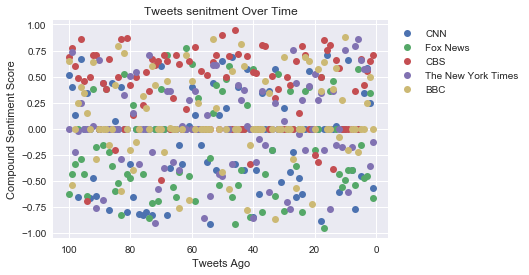

In [14]:
news_org=["CNN", "Fox News", "CBS", "The New York Times", "BBC"]
for news in news_org:
    subset=sentiment_df[sentiment_df["Company"]==news]
    plt.plot(np.arange(-len(subset),0,1), subset["compound"], "o",label=news)
plt.xlabel("Tweets Ago")
plt.ylabel("Compound Sentiment Score")
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.title("Tweets senitment Over Time")
plt.legend(bbox_to_anchor=(1,1))
plt.savefig('NewsTweets.png')
plt.show()

In [15]:
compound_sentiment=sentiment_df.groupby("Company").mean()["compound"]
company_data=pd.DataFrame(compound_sentiment)

In [16]:
company_data.reset_index(inplace=True)

In [17]:
BBC=company_data[company_data["Company"]=="BBC"]["compound"]
CNN=company_data[company_data["Company"]=="CNN"]["compound"]
Fox_News=company_data[company_data["Company"]=="Fox News"]["compound"]
NYT=company_data[company_data["Company"]=="The New York Times"]["compound"]
CBS=company_data[company_data["Company"]=="CBS"]["compound"]


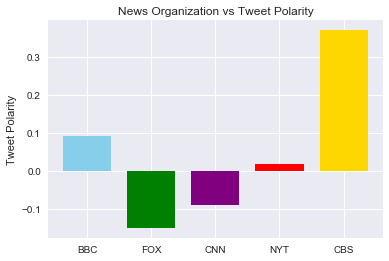

In [18]:
tweets_polarity=[BBC, Fox_News, CNN, NYT, CBS]

# generate bars for each news source
fig, ax = plt.subplots()
ind = np.arange(len(tweets_polarity))
width = 0.75

BBC = ax.bar(ind[0], tweets_polarity[0], width, color="skyblue")
Fox = ax.bar(ind[1], tweets_polarity[1], width, color="green")
CNN = ax.bar(ind[2], tweets_polarity[2], width, color="purple")
NYT = ax.bar(ind[3], tweets_polarity[3], width, color="red")
CBS = ax.bar(ind[4], tweets_polarity[4], width, color="gold")

ax.set_ylabel("Tweet Polarity")
ax.set_title("News Organization vs Tweet Polarity")
ax.set_xticks(ind)
ax.set_xticklabels(["BBC", "FOX", "CNN", "NYT", "CBS"])
ax.grid(True)
plt.savefig('BarNewsTweets.png')

# insert text labels into bars (See Pymaceuticals homework solution at the end)